In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Define path to your dataset and output directory
data_dir = 'dataset'
output_dir = 'augmented_data'

# Create output directories if they don't exist
os.makedirs(os.path.join(output_dir, 'creative_ad'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'non_creative_ad'), exist_ok=True)

# Parameters for data augmentation
augmentation_factor = 5  # Increase the number of images by 5x
image_height = 150
image_width = 150

# Configure data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load and augment each original image
for root, dirs, files in os.walk(data_dir):
    for filename in files:
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(root, filename)
            img = load_img(img_path, target_size=(image_height, image_width))
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)

            # Determine label based on folder name
            label = os.path.basename(root)  # Assuming folder name indicates label (creative_ad or non_creative_ad)

            # Generate augmented images
            i = 0
            for batch in datagen.flow(x, batch_size=1, save_to_dir=os.path.join(output_dir, label), save_prefix='aug', save_format='jpeg'):
                i += 1
                if i >= augmentation_factor:
                    break  # Stop augmentation after reaching desired number of images


Found 590 images belonging to 2 classes.
Sample images from Train Dataset:


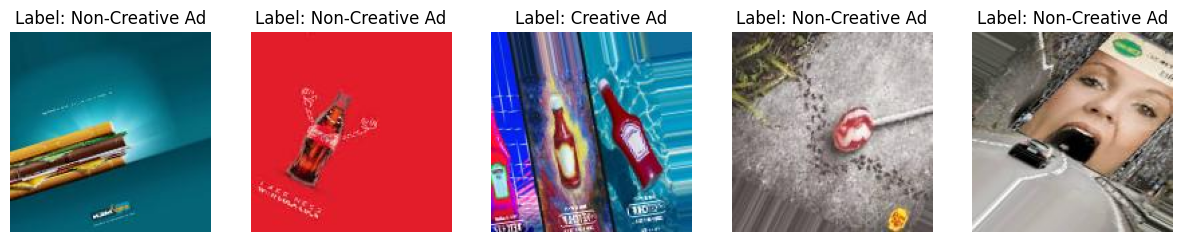

Sample images from Validation Dataset:


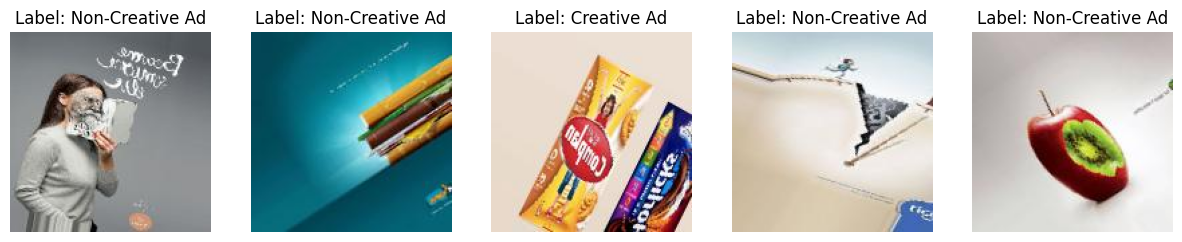

Sample images from Test Dataset:


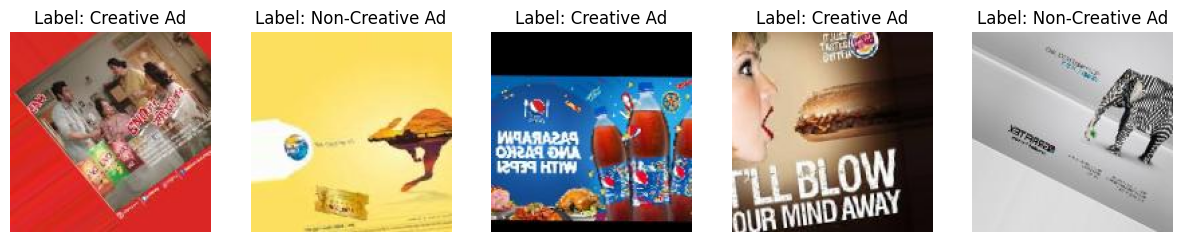

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Define path to augmented dataset
data_dir = 'augmented_data'

# Parameters for splitting and visualization
validation_split = 0.2
test_split = 0.1
image_height = 150
image_width = 150
batch_size = 10

# Create ImageDataGenerator for loading images
datagen = ImageDataGenerator(rescale=1./255)

# Load all images from the directory with their labels
data_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

# Split the dataset into train, validation, and test sets
X = np.array(data_generator.filepaths)
y = np.array(data_generator.labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=validation_split, random_state=42)

# Function to plot sample images from a dataset
def plot_sample_images(dataset, labels, num_samples=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        img = plt.imread(dataset[i])
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title('Label: {}'.format('Creative Ad' if labels[i] == 1 else 'Non-Creative Ad'))
        plt.axis('off')
    plt.show()

# Plot sample images from train, validation, and test sets
print("Sample images from Train Dataset:")
plot_sample_images(X_train, y_train)

print("Sample images from Validation Dataset:")
plot_sample_images(X_val, y_val)

print("Sample images from Test Dataset:")
plot_sample_images(X_test, y_test)


Found 473 images belonging to 2 classes.
Found 117 images belonging to 2 classes.
Epoch 1/20
47/47 [==============================] - ETA: 0s - loss: 0.6810 - accuracy: 0.5940
Epoch 1: val_accuracy improved from -inf to 0.80909, saving model to best_model.h5


C:\Users\lenovo d0in\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


47/47 [==============================] - 18s 362ms/step - loss: 0.6810 - accuracy: 0.5940 - val_loss: 0.4322 - val_accuracy: 0.8091
Epoch 2/20
47/47 [==============================] - ETA: 0s - loss: 0.4186 - accuracy: 0.8315
Epoch 2: val_accuracy improved from 0.80909 to 0.87273, saving model to best_model.h5
47/47 [==============================] - 16s 332ms/step - loss: 0.4186 - accuracy: 0.8315 - val_loss: 0.3913 - val_accuracy: 0.8727
Epoch 3/20
47/47 [==============================] - ETA: 0s - loss: 0.3734 - accuracy: 0.8618
Epoch 3: val_accuracy did not improve from 0.87273
47/47 [==============================] - 14s 295ms/step - loss: 0.3734 - accuracy: 0.8618 - val_loss: 0.3830 - val_accuracy: 0.8000
Epoch 4/20
47/47 [==============================] - ETA: 0s - loss: 0.3683 - accuracy: 0.8488
Epoch 4: val_accuracy did not improve from 0.87273
47/47 [==============================] - 14s 300ms/step - loss: 0.3683 - accuracy: 0.8488 - val_loss: 0.3693 - val_accuracy: 0.8273
Ep

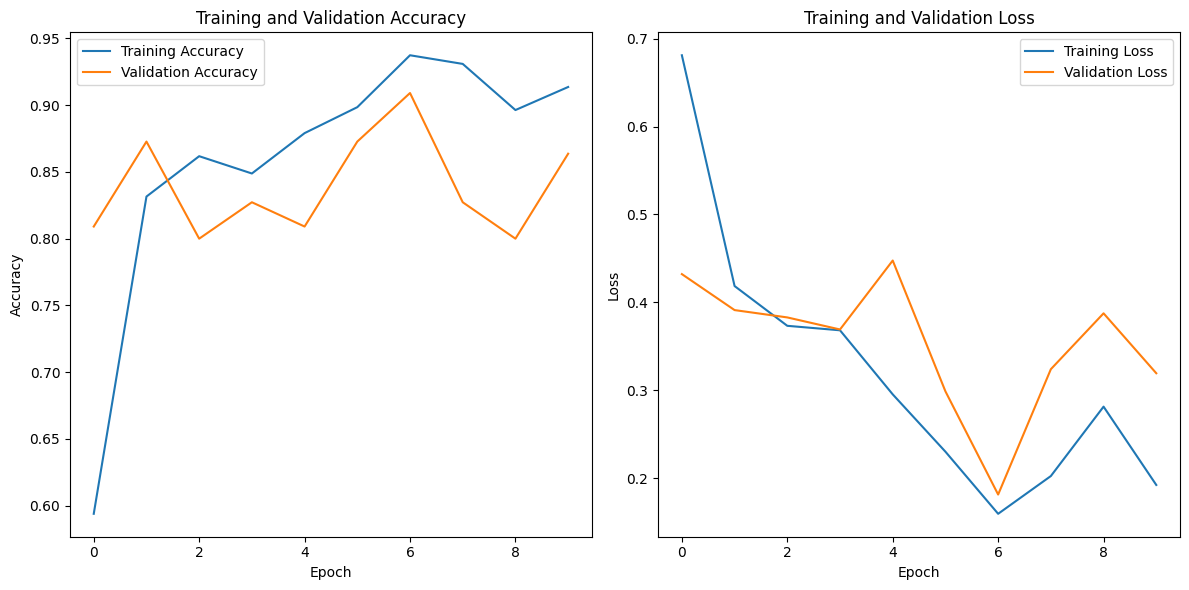

Found 117 images belonging to 2 classes.
12/12 [==============================] - 1s 42ms/step - loss: 0.1864 - accuracy: 0.8974
Test Accuracy: 0.8974359035491943
Trained model saved successfully.


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Define path to augmented dataset
data_dir = 'augmented_data'

# Parameters for dataset and model
validation_split = 0.2
test_split = 0.1
image_height = 150
image_width = 150
batch_size = 10
epochs = 20

# Create ImageDataGenerator for loading images
datagen = ImageDataGenerator(rescale=1./255, validation_split=validation_split)

# Load and split the dataset into train, validation, and test sets
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

# Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (ad vs. non-ad)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define callbacks for model checkpoints and early stopping
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
early_stopping_callback = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint_callback, early_stopping_callback]
)

# Plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot training history (accuracy and loss curves)
plot_training_history(history)

# Evaluate the model on the test set
test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',  # Use validation subset as the test set
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

# Save the trained model
model.save('final_model.h5')
print("Trained model saved successfully.")


1/1 [==============================] - 0s 23ms/step
Length of y_true: 96
Length of y_pred: 96


<Figure size 800x600 with 0 Axes>

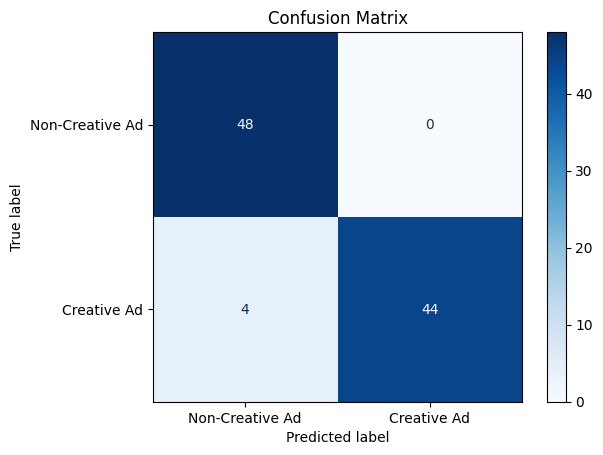

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define path to the test folder
test_dir = 'test'

# Load the saved model
model_path = 'final_model.h5'
model = load_model(model_path)

# Initialize lists to store true and predicted labels
y_true = []
y_pred = []

# Define class labels based on folder names
class_labels = os.listdir(test_dir)

# Iterate through the test folder to make predictions
for label in class_labels:
    label_dir = os.path.join(test_dir, label)
    for filename in os.listdir(label_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(label_dir, filename)
            
            # Load and preprocess the image
            img = load_img(image_path, target_size=(150, 150))
            img_array = img_to_array(img) / 255.0  # Rescale pixel values to [0, 1]
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
            
            # Make predictions using the loaded model
            prediction = model.predict(img_array)
            predicted_label = 1 if prediction > 0.5 else 0  # Assuming threshold of 0.5 for binary classification
            
            # Assign true and predicted labels
            if label == 'non_creative_ad':
                y_true.append(1)  # 1 represents 'Creative Ad'
            elif label == 'creative_ad':
                y_true.append(0)  # 0 represents 'Non-Creative Ad'
            
            y_pred.append(predicted_label)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Check lengths of y_true and y_pred
print("Length of y_true:", len(y_true))
print("Length of y_pred:", len(y_pred))

# Compute confusion matrix and plot
class_names = ['Non-Creative Ad', 'Creative Ad']
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


# Ideas to reduce the false possitve prediction

In [5]:
'''1.Adjsut Classification Threshold Value,
2.Class Weight Balancing,
3. Data Augmentation.
4. Feature Engineering'''

'1.Adjsut Classification Threshold Value,\n2.Class Weight Balancing,\n3. Data Augmentation.\n4. Feature Engineering'